# Correlation Analysis

Correlation analysis is a fundamental statistical tool used to study the relationship between two or more variables. The term "correlation" originates from the Latin *correlatio*, meaning a mutual relationship. In the realm of statistics, correlation is specifically employed as a "measure of association," which quantifies the strength and direction of a relationship between two variables.

Understanding correlation is essential in data science as it helps in predicting one variable based on the presence of another, determining the association between variables, and in feature selection during the modeling phase. Correlations are also often used as a starting point for a deeper understanding for a deeper, *causal* understanding of a certain system (we will later see that correlation and causation are very clearly **not** the same!). 

In everyday life, we say that something *correlates* when different events or measurements align very well. Or we refer to things such as co-incidence. In the following, however, we are looking for a metric that can numerically describe whether a correlation exists and, if so, how pronounced it is.

### Covariance, (Pearson) Correlation Coefficient
**Covariance**  
A first option for measuring correlation is through variance, which measures the spread of individual data points around the mean. Expanding from variance, we encounter **covariance**, a measure that extends the idea to two variables. Covariance quantifies how much two variables change together, but its value is scale-dependent, making it difficult to interpret directly.

The formula for covariance between two variables X and Y is given by:

$$
Cov(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x_i})(y_i - \bar{y_i})
$$

where $\bar{x_i}$ and $\bar{y_i}$​ are the means of $X$ and $Y$, respectively.

**Pearson Correlation Coefficient**  
To address the limitations of covariance, the **Pearson Correlation Coefficient** offers a normalized measure of correlation. This coefficient, often simply referred to as the correlation coefficient, is a dimensionless number between -1 and 1. It not only shows the strength but also the direction of the linear relationship between two variables.

The Pearson Correlation Coefficient is calculated as:

$$
Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$

This formula normalizes the covariance by the product of the standard deviations of the variables, thus providing a clearer, scale-independent measure of their relationship.

Now let's have a hands-on look at some examples of correlation, and how they can be quantified.

In [1]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb

# Set the ggplot style (optional)
plt.style.use("ggplot")

In [6]:
# Create some toy data

# Random number generator
rng = np.random.default_rng(seed=0)

# Genereated data
a = np.arange(0, 50)
b = a + rng.integers(-10, 10, 50)
c = a + rng.integers(-20, 25, 50)
d = rng.integers(0, 50, 50)

corr_data = pd.DataFrame({"a": a,
                         "b": b,
                         "c": c,
                         "d": d})

In [7]:
corr_data.head(3)

,a,b,c,d
0,0,7,14,20
1,1,3,-2,39
2,2,2,2,15


We created some toy data with four features (a, b, c, d). One way to look for interesting relationships between different features is simply to plot one variable (or feature) against another:

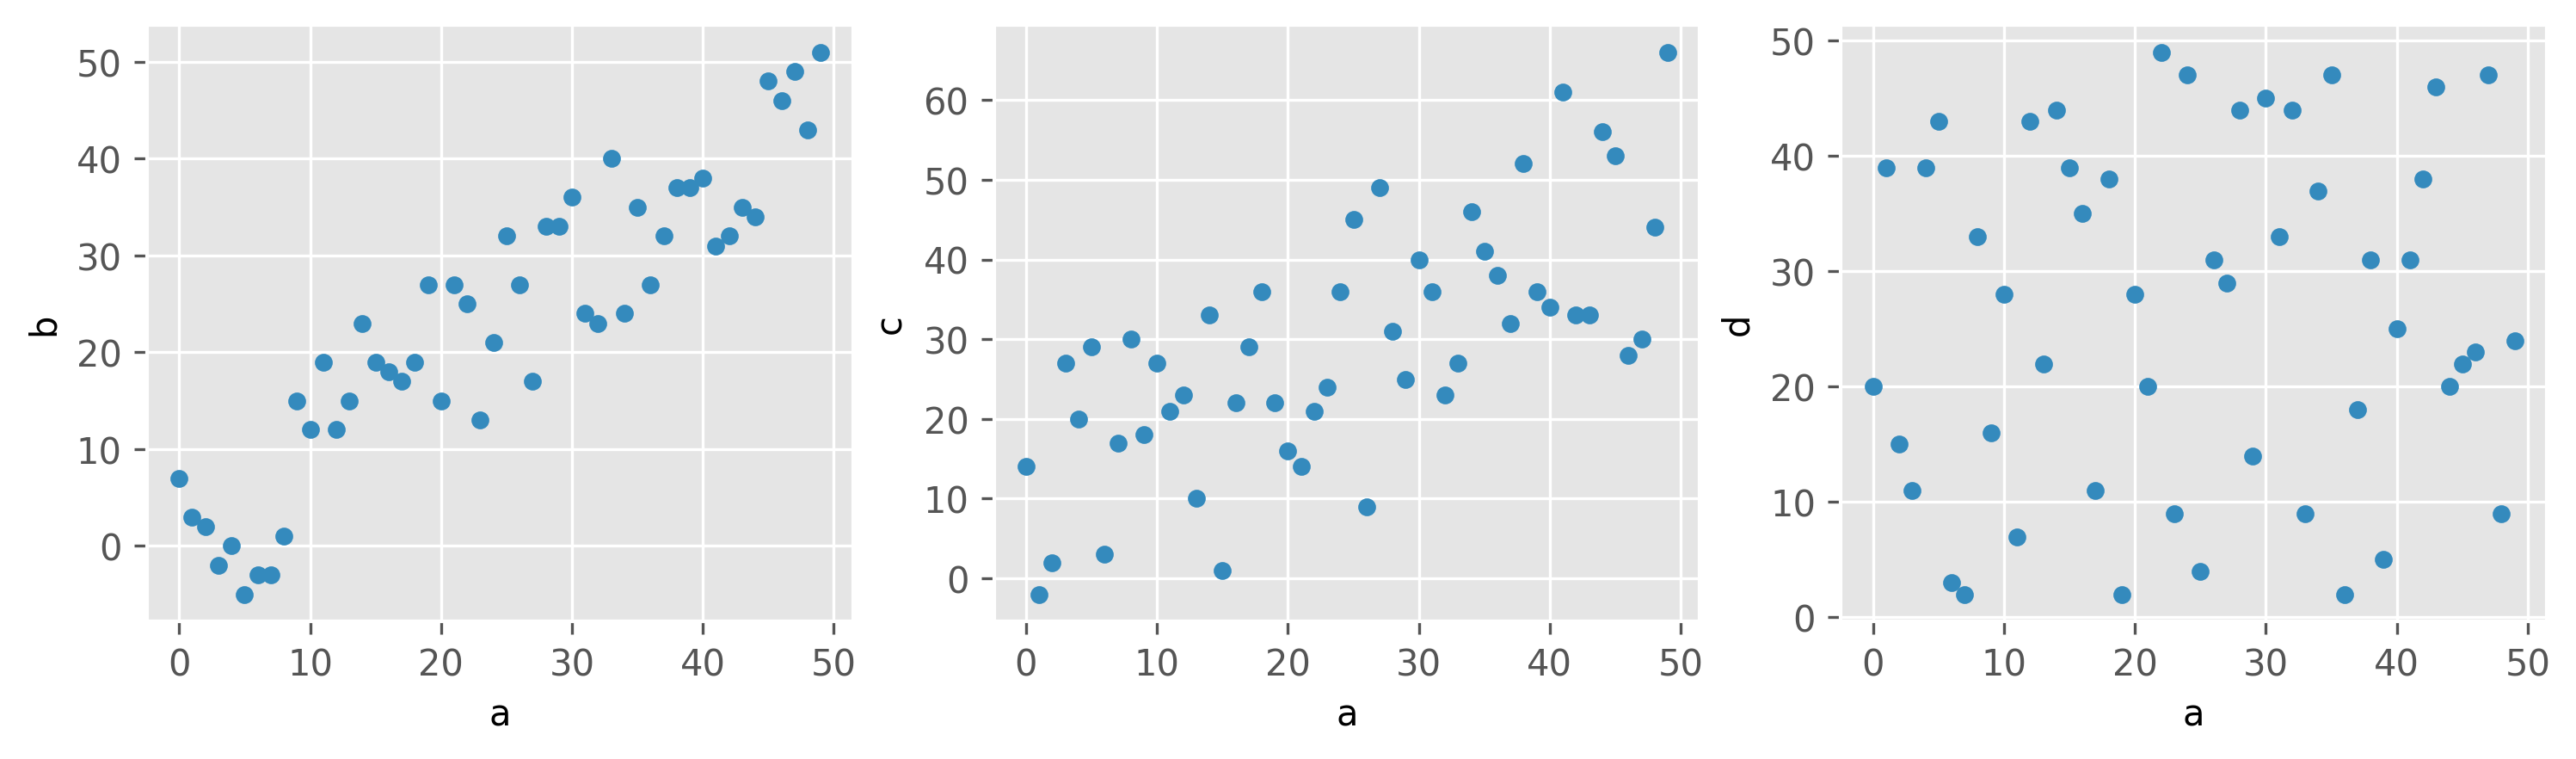

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3), dpi=300)

corr_data.plot(kind="scatter", x="a", y="b", ax=ax1)
corr_data.plot(kind="scatter", x="a", y="c", ax=ax2)
corr_data.plot(kind="scatter", x="a", y="d", ax=ax3)
plt.show()

What would you say, which features are correlated, and which are not?

Here, different variables are plotted against each other, a-b, a-c, and a-d. I guess most will agree that the first and second plots show a certain degree of correlation. First, between a and b, and in the second panel between a and c. The third panel shows two features that apparently are entirely unrelated in their behavior. Another thing we can see in those examples is that we should be able to measure different degrees or strengths of a correlation. 

We can see the correlation in a<->b. The Pearson Correlation Coefficient measures this type of correlation very well. For this example, the values are:

In [15]:
print(f"Corr(a, b) = {np.corrcoef(corr_data.a, corr_data.b)[1, 0]:.2f}")
print(f"Corr(a, c) = {np.corrcoef(corr_data.a, corr_data.c)[1, 0]:.2f}")
print(f"Corr(a, d) = {np.corrcoef(corr_data.a, corr_data.d)[1, 0]:.2f}")

Corr(a, b) = 0.91
Corr(a, c) = 0.70
Corr(a, d) = 0.07


We would thus see a strong correlation between a and b and a moderate correlation between a and c. However, there is no noticeable correlation between a and d.

The correlation coefficient allows us to quickly identify significant correlations in the data. For datasets with many variables (or features), we can easily determine the correlations for all combinations of the variables, resulting in what is called a correlation matrix.

### Correlation Matrix

The correlation matrix for data with the variables a, b, and c would thus be a matrix that contains the Pearson Correlation Coefficients for all possible combinations, i.e.:

|       | a            | b            | c            |
| :---: | ------------ | ------------ | ------------ |
| **a** | $Corr(a, a)$ | $Corr(b, a)$ | $Corr(c, a)$ |
| **b** | $Corr(a, b)$ | $Corr(b, b)$ | $Corr(c, b)$ |
| **c** | $Corr(a, c)$ | $Corr(b, c)$ | $Corr(c, c)$ |

The diagonal is trivial and always equals 1. The actual points of interest are the particularly high and low values off the diagonal, as they indicate strong correlations or anti-correlations (with a negative sign).

Using `Pandas` we can very easily compute the Pearson correlations between all possible pairs of numerical features in a dataset:

In [9]:
corr_data.corr()

,a,b,c,d
a,1.000000,0.913443,0.697268,0.073561
b,0.913443,1.000000,0.594195,0.063557
c,0.697268,0.594195,1.000000,0.071658
d,0.073561,0.063557,0.071658,1.000000


**More specific example**

In the following we still look at generated data, but data which is somewhat realistic. We want to see if body measures show any interesting correlations, say between shoe size and height of people.

In [5]:
filename = r"https://raw.githubusercontent.com/florian-huber/data_science_course/main/datasets/wo_men.csv"

data_people = pd.read_csv(filename)
data_people["age"] = np.random.randint(16, 72, len(data_people))
data_people.head()

,time,sex,height,shoe_size,age
0,04.10.2016 17:58:51,woman,160.0,40.0,56
1,04.10.2016 17:58:59,woman,171.0,39.0,24
2,04.10.2016 18:00:15,woman,174.0,39.0,35
3,04.10.2016 18:01:17,woman,176.0,40.0,47
4,04.10.2016 18:01:22,man,195.0,46.0,24


Let's first do some standard inspection of the data.

In [6]:
data_people.describe()

,height,shoe_size,age
count,100.000000,100.00000,101.000000
mean,165.233800,39.77500,43.227723
std,39.817544,5.55613,15.786628
min,1.630000,35.00000,17.000000
25%,163.000000,38.00000,30.000000
50%,168.500000,39.00000,42.000000
75%,174.250000,40.00000,56.000000
max,364.000000,88.00000,70.000000


**Basic cleaning or processing**

In the table above, some things seem weird. The minimum height is 1.63 and the maximum height is 364.0. Probably some fantasy figures, one apparently also with shoe size 88. This are typical issues we can quickly discover in a first inspection and then decide what to do about it. Here, we will simply decide to only take data within more or less realistic boundaries. 

In [7]:
mask = (data_people["shoe_size"] < 50) & (data_people["height"] > 100) & (data_people["height"] < 250)
data_people = data_people[mask]

We can then move on to the correlations:

In [8]:
data_people.corr(numeric_only=True)

,height,shoe_size,age
height,1.000000,0.834646,-0.092439
shoe_size,0.834646,1.000000,-0.076316
age,-0.092439,-0.076316,1.000000


**Question:** What does that actually mean?

Instead of as a matrix with values, the correlation matrix is often also graphically represented, especially for larger datasets, to easily spot particularly high and low coefficients.

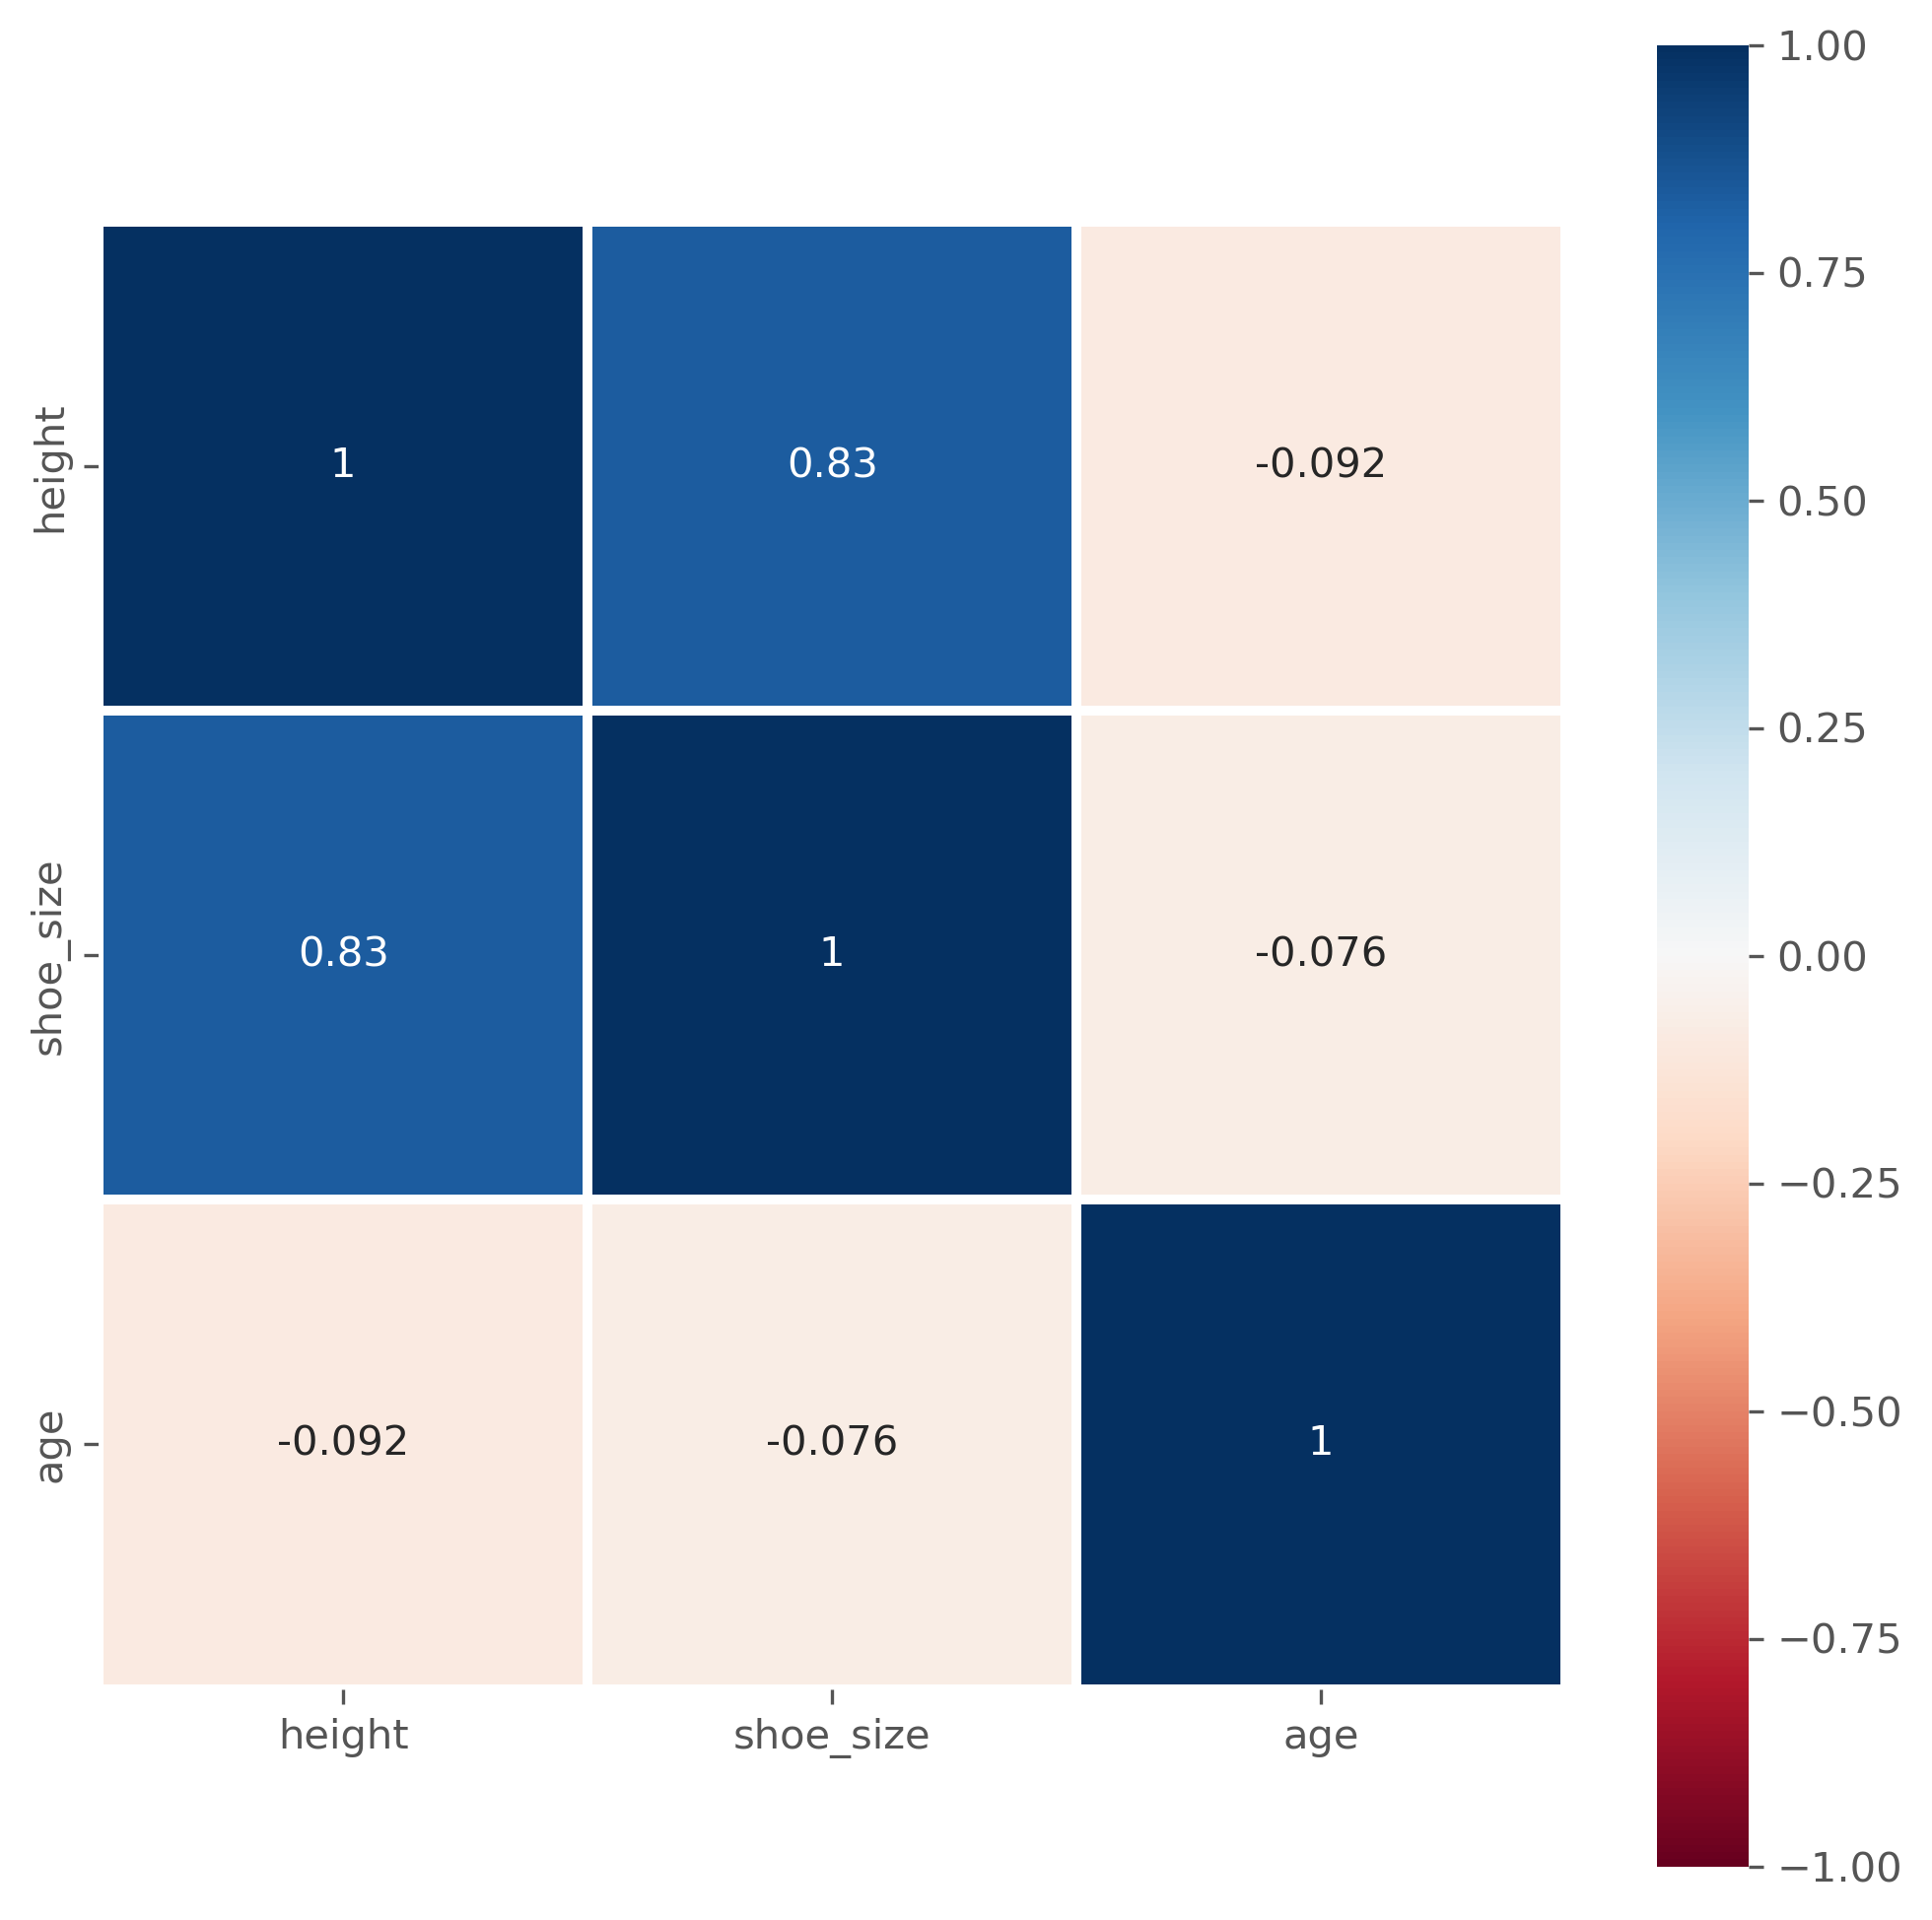

In [10]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

sb.heatmap(
    data_people.corr(numeric_only=True),  # this is required for pandas >= 2.0, but also generally a good idea.
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

### Limitations of the (Pearson) Correlation Measure
Pronounced high (or low) correlation coefficients indicate actual correlations in the data, which -in the case of the Pearson correlation- usually means that there is a clear linear dependency between two features.

This approach, however, has several limitations that can complicate the interpretation of such correlation measures. In the following, the most common pitfalls will be presented.

**The value of the slope has no influence**  
The strength of a correlation is a measure of how clear the linear dependency between two features is. But the result is not dependent on the slope of such a relation between two values (only on the sign of it). See the plot below:

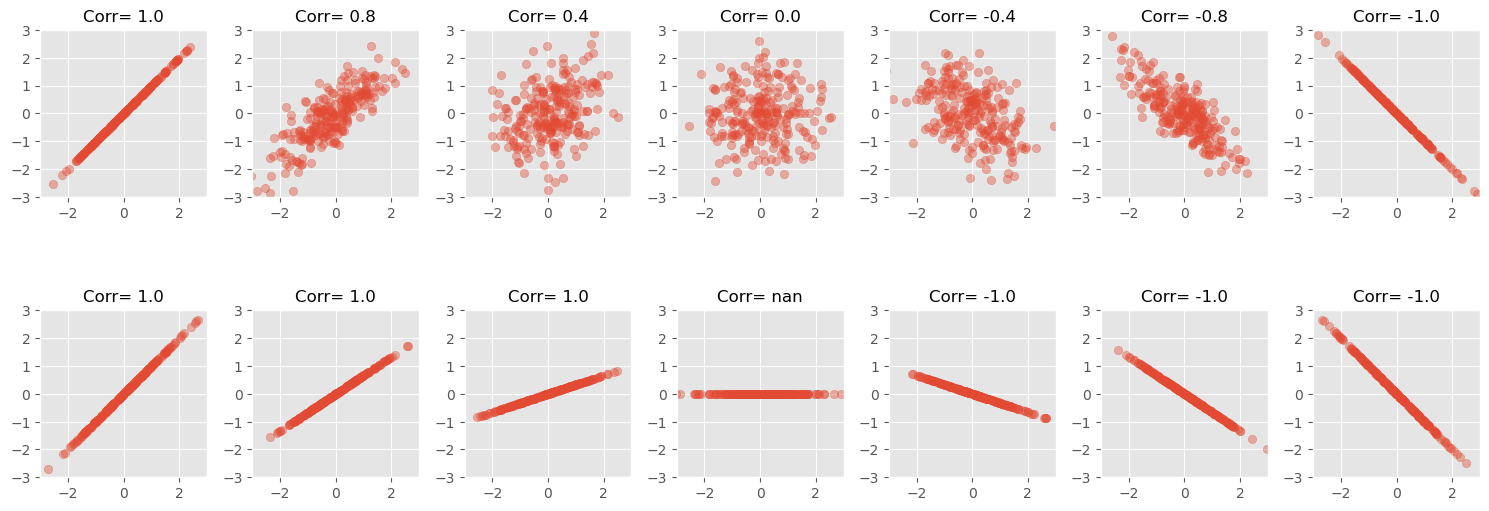

In [55]:
NUM_POINTS = 250

# Seed for reproducibility
np.random.seed(0)

def scatter_plot(ax, x, y):
    # Create scatter plot
    ax.scatter(x, y, alpha=0.4)

    # Set aspect to equal for better comparison
    ax.set_aspect('equal')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])

def scatter_corr(ax, corr_coef, num_points=NUM_POINTS):
    """ A function to create scatter plots with different correlation coefficients."""
    x = np.random.normal(0, 1, num_points)
    y = x * corr_coef + np.random.normal(0, np.sqrt(1 - corr_coef**2), num_points)

    scatter_plot(ax, x, y)
    ax.set_title(f"Corr= {corr_coef:.1f}", fontsize=12)

def scatter_linear(ax, slope, num_points=NUM_POINTS):
    """ A function to create scatter plots with different correlation coefficients."""
    x = np.random.normal(0, 1, num_points)
    y = x * slope
    scatter_plot(ax, x, y)
    corr_coef = np.corrcoef(x, y)[1, 0]
    ax.set_title(f"Corr= {corr_coef:.1f}", fontsize=12)


# Loop through the correlation coefficients, creating two scatter plots for each
correlation_coefficients = [1, 0.8, 0.4, 0, -0.4, -0.8, -1]
slopes = [1, 2/3, 1/3, 0, -1/3, -2/3, -1]

fig, axes = plt.subplots(2, len(correlation_coefficients), figsize=(15, 6))
for i, coef in enumerate(correlation_coefficients):
    scatter_corr(axes[0, i], coef)
for i, slope in enumerate(slopes):
    scatter_linear(axes[1, i], slope)

# Tight layout to minimize the overlap
fig.tight_layout()
plt.show()

**(Pearson) correlation coefficients only detects linear relationships**  
While pronounced correlation coefficients reflect a clear dependency between values, a low correlation coefficient is more complicated to interpret. Most importantly, a low correlation does not imply that there is no significant relationship!

The following figure shows data with clearly visible pattern (to the human eye), but with no, or nearly no detectable Pearson correlation.

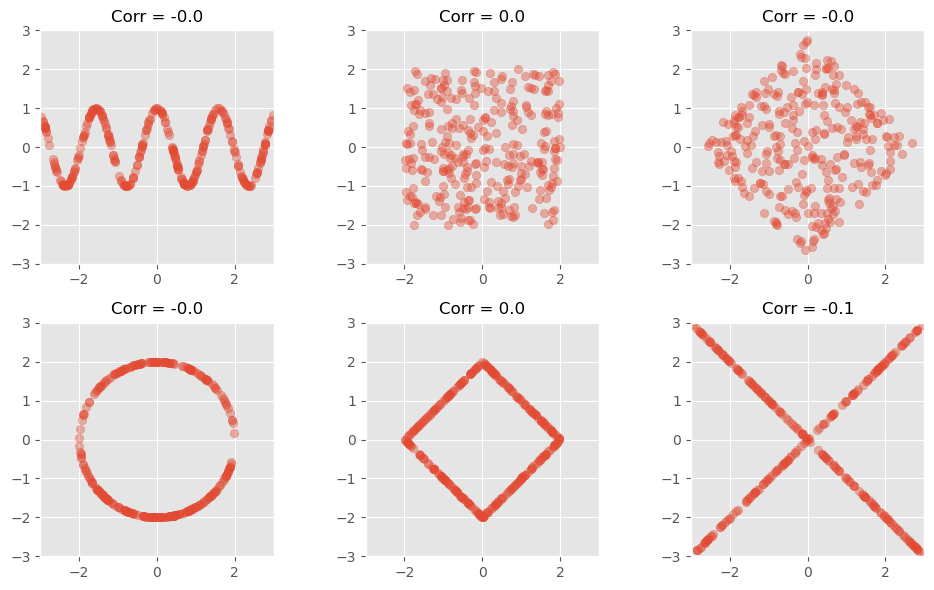

In [67]:
# Seed for reproducibility
np.random.seed(0)

# Define a function to create scatter plots with non-linear relationships
def scatter_nonlinear(ax, pattern):
    # Generate x values
    x = np.random.uniform(-3, 3, 300)
    if pattern == 'wave':
        y = np.cos(x*4)
    elif pattern == 'square':
        y = np.random.uniform(-3, 3, 300)
        x *= 2/3
        y *= 2/3
    elif pattern == 'square_rotated':
        y = np.random.uniform(-3, 3, 300)
        points = np.vstack([2/3*x, 2/3*y])
        theta = np.radians(45)
        c, s = np.cos(theta), np.sin(theta)
        rotation_matrix = np.array([[c, -s], [s, c]])
        rotated_points = rotation_matrix.dot(points)
        (x, y) = rotated_points
    elif pattern == 'circle':
        x = np.random.uniform(-1, 1, 300)
        y = np.sqrt(1 - x**2) * np.random.choice([1, -1], 300)
        x *= 2
        y *= 2
    elif pattern == 'diamond':
        y = np.random.uniform(-3, 3, 300)
        y = np.sign(y) * (3 - np.abs(x))
        x *= 2/3
        y *= 2/3       
    elif pattern == 'x':
        y = np.abs(x) * np.random.choice([1, -1], 300)

    # Create scatter plot
    scatter_plot(ax, x, y)
    corr_coef = np.corrcoef(x, y)[1, 0]
    ax.set_title(f"Corr = {corr_coef:.1f}", fontsize=12)

# Define the patterns to be visualized
patterns1 = ['wave', 'square', 'square_rotated']
patterns2 = ['circle', 'diamond', 'x']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, pattern in enumerate(patterns1):
    scatter_nonlinear(axes[0, i], pattern)
for i, pattern in enumerate(patterns2):
    scatter_nonlinear(axes[1, i], pattern)

# Tight layout to minimize the overlap
fig.tight_layout()
plt.show()

Another prominent example to illustrate how little the Pearson correlation coefficient sometimes tells us is the `datasaurus` dataset from the last chapter. Here, too, the data is distributed very differently, but the correlation coefficient remains the same.

**Correlation coefficient is very sensitive to outliers**

Another well-known illustrative example for the limitations of the correlation coefficient is "Anscombe's quartet {cite}`anscombe_graphs_1973`. This includes the already mentioned restriction to mostly linear relationships. But it also demonstrates nicely, that the correlation coefficient can change drastically due to one or few outliers in our data as can be seen in the following plots:

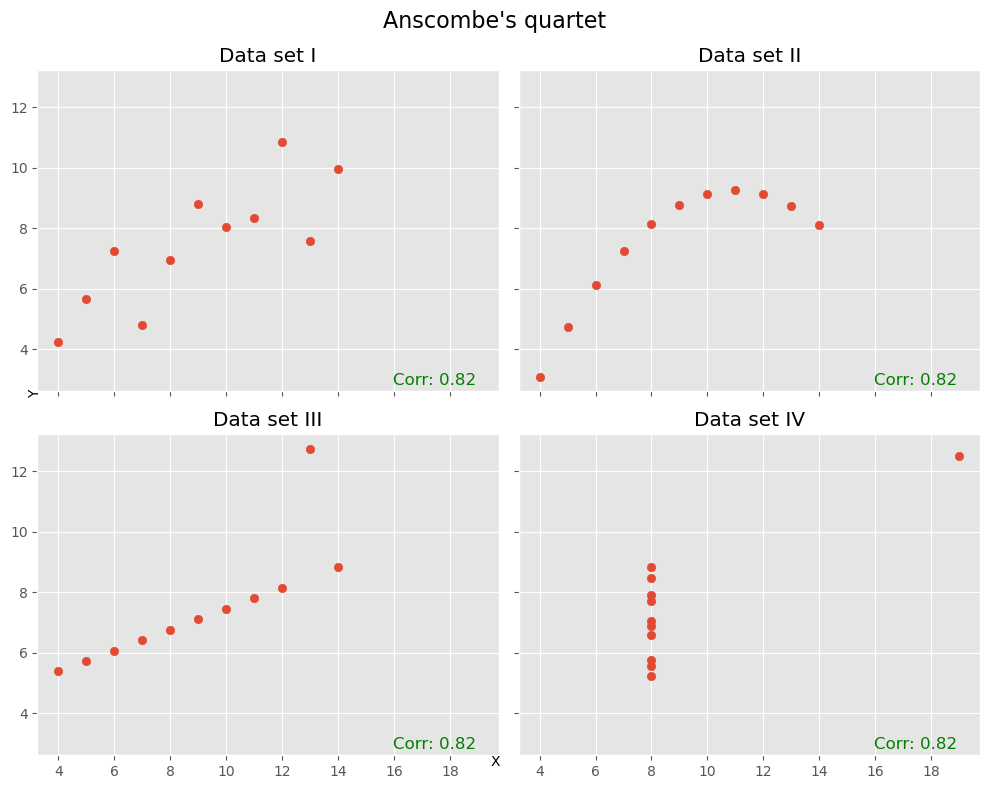

In [66]:
# Defining the Anscombe's quartet dataset
anscombe_data = {
    'I': {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    'II': {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    'III': {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    'IV': {
        'x': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

# Plotting the Anscombe's quartet
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axs = axs.flatten()  # To make it easier to iterate over

# Calculating the correlation coefficient for each dataset
correlation_coefficients = []

for i, (key, data) in enumerate(anscombe_data.items()):
    axs[i].scatter(data['x'], data['y'])
    axs[i].set_title(f"Data set {key}")
    # Calculating the Pearson correlation coefficient for each dataset
    corr_coef = np.corrcoef(data['x'], data['y'])[0, 1]
    correlation_coefficients.append(corr_coef)
    axs[i].text(0.95, 0.01, f'Corr: {corr_coef:.2f}', verticalalignment='bottom', horizontalalignment='right',
                transform=axs[i].transAxes, color='green', fontsize=12)

# Set common labels
fig.text(0.5, 0.04, 'X', ha='center', va='center')
fig.text(0.04, 0.5, 'Y', ha='center', va='center', rotation='vertical')

plt.suptitle("Anscombe's quartet", fontsize=16)
plt.tight_layout()
plt.show()

**In many cases (such as the ones above), Pearson correlation is not enough!**

Just like before, with statistical metrics vs. actual distributions, the correlation coefficient sometimes proves to be too *rough*, and we might want to look more closely at the data. If there aren't too many variables, this can be done with the `pairplot()` function from seaborn. We will here do this with the `data_people` we used further above.

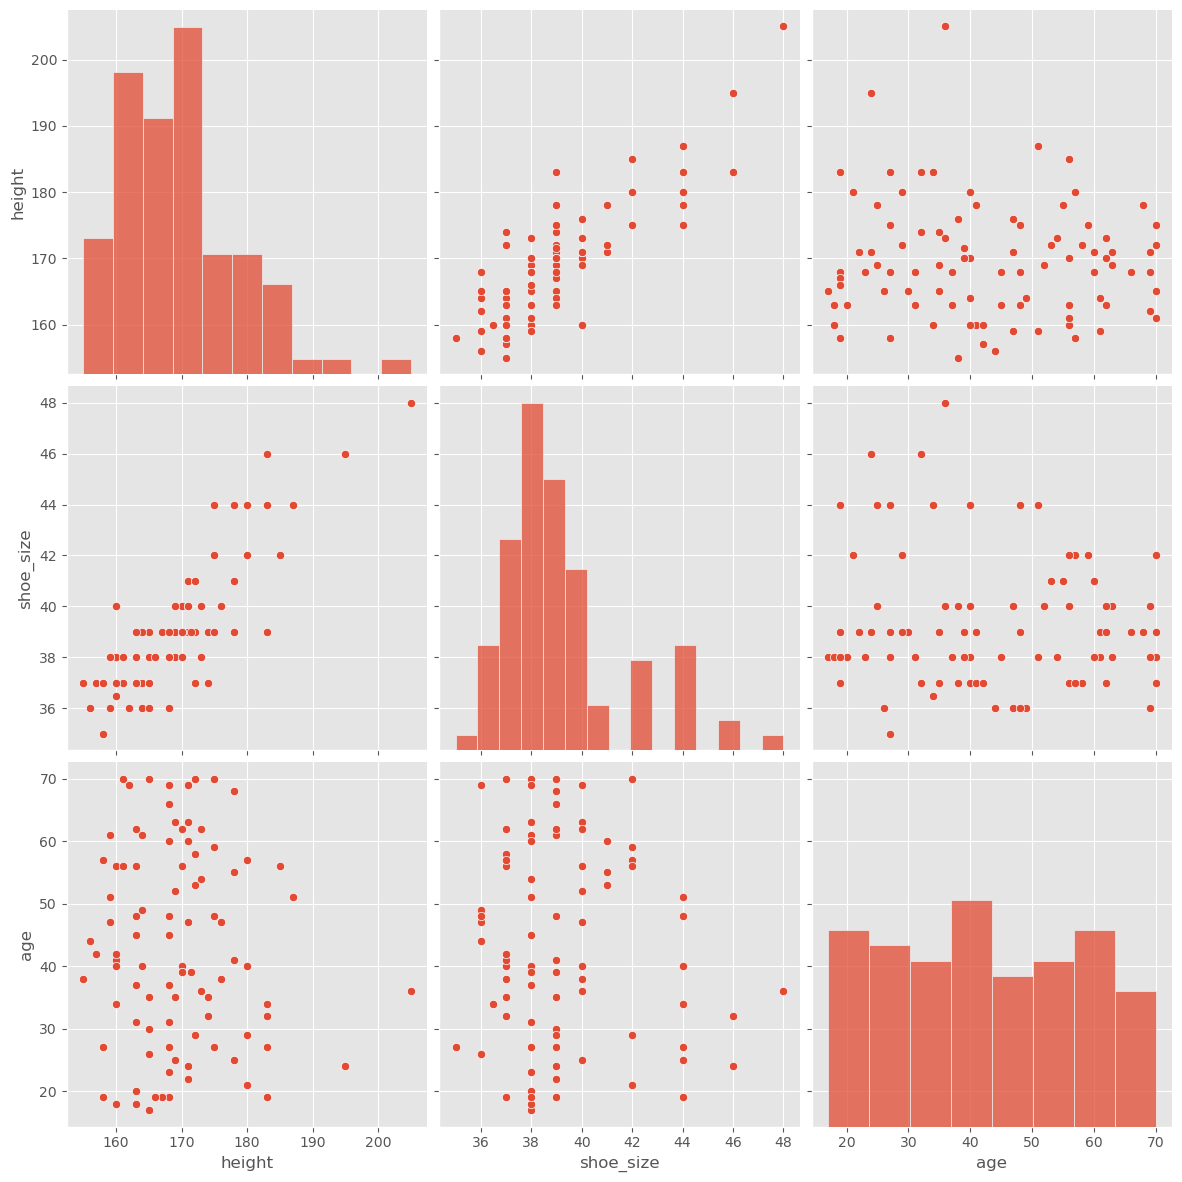

In [11]:
sb.pairplot(data_people, height=4)
plt.show()

It is of course also easily possible to plot only the parts we are most interested in, for instance:

<Axes: xlabel='shoe_size', ylabel='height'>

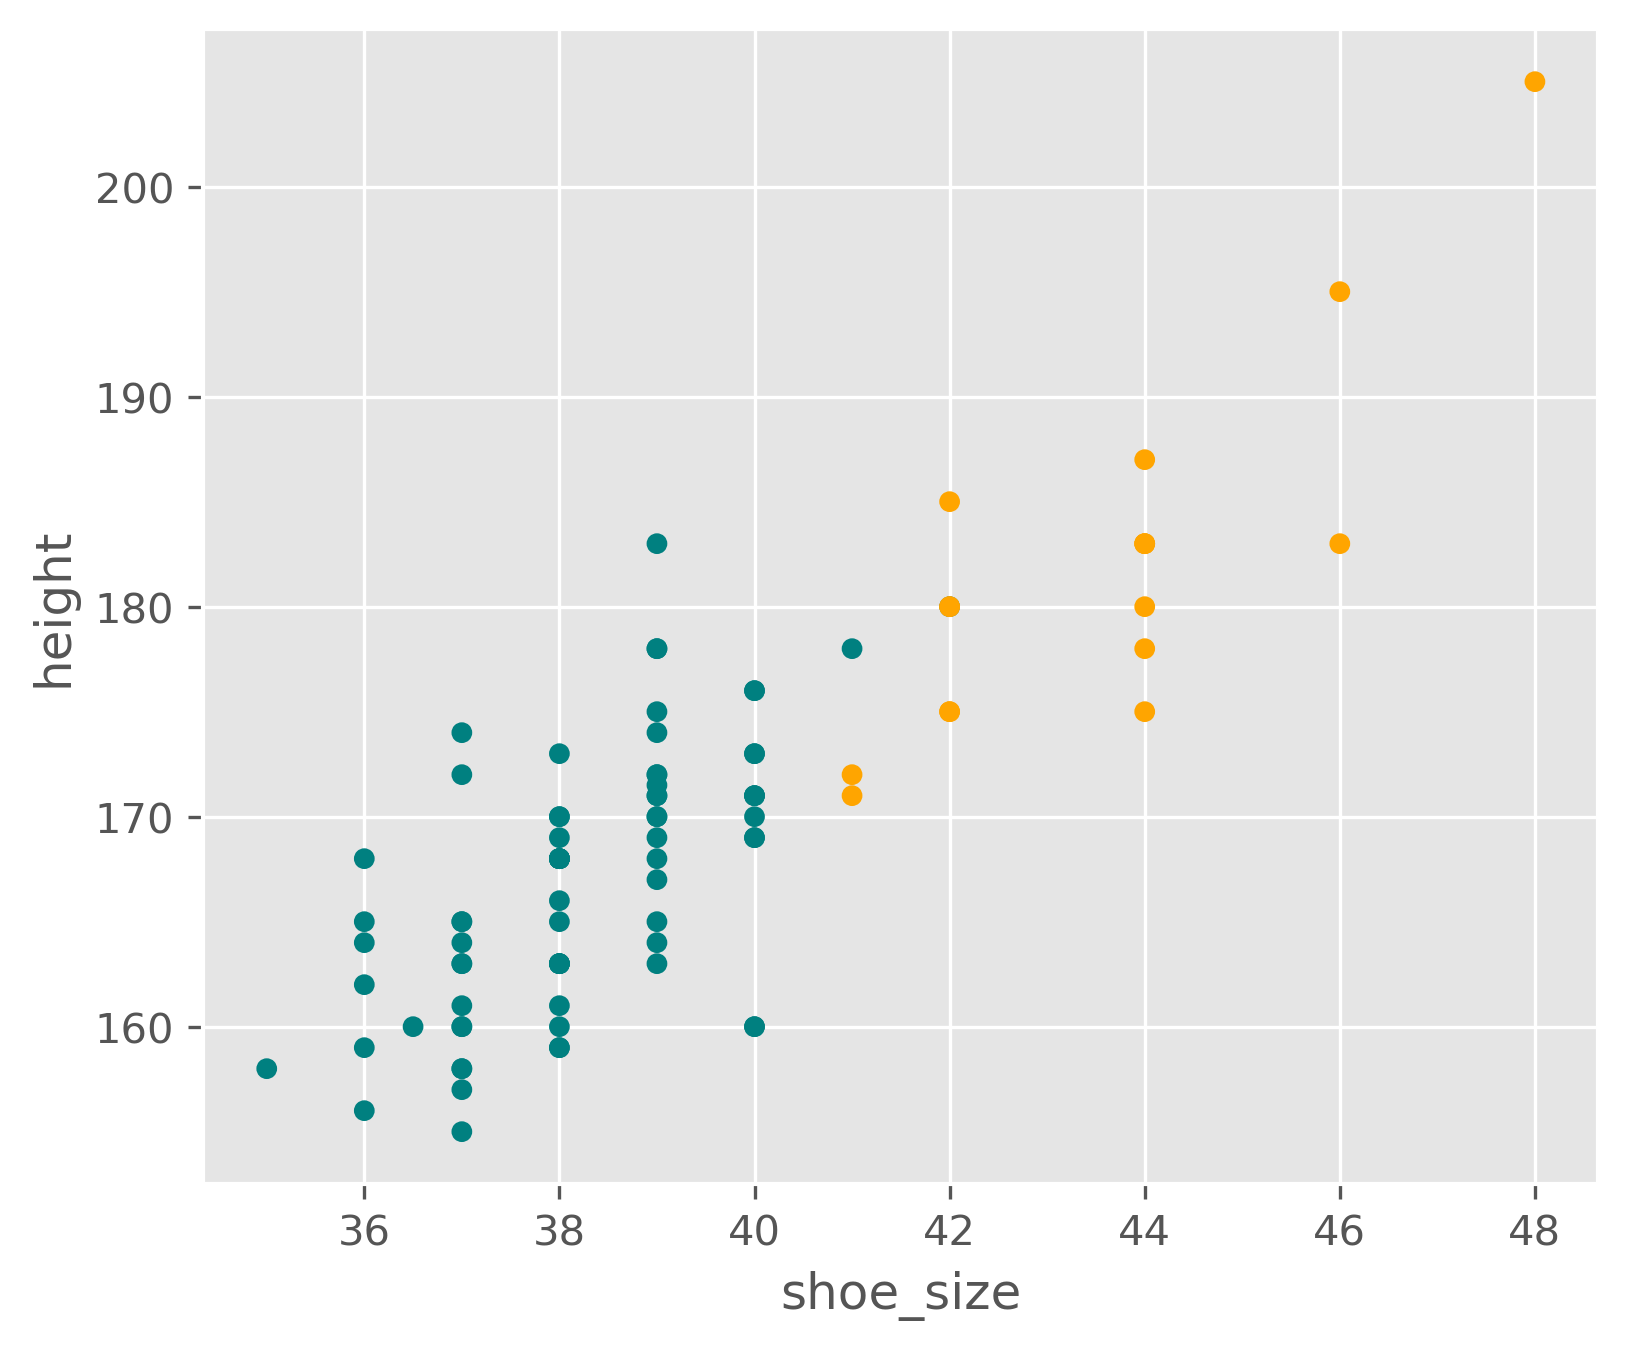

In [12]:
colors = ["orange" if x=="man" else "teal" for x in data_people.sex]

fig, ax = plt.subplots(figsize=(6,5), dpi=300)
data_people.plot(kind="scatter", x="shoe_size", y="height", c=colors, ax=ax)

### What Does a Correlation Tell Us?

If we discover correlations in our data, for example, through high or low Pearson Correlation Coefficients, what can we do with it?

Although high or low coefficients are often the first thing we look for, a value of 1.0 or -1.0 isn't necessarily a cause for celebration, even though these values describe a maximum correlation.

The reason is simple. If two variables are perfectly correlated, it means one can perfectly describe the other. They do not provide more information than just one of them alone. Moreover, in practice, a correlation of 1.0 (or -1.0) is more likely a result of both variables describing the same thing. Typical examples would be temperature given in both Celsius and Kelvin or the circumference and diameter of wheels. In such cases, correlations mainly tell us which variables can be discarded.

### Correlation vs. Causality

Searching for correlations within data is often a pivotal step in the data science process. But why? What can we do with a high correlation (that isn't too high, i.e., equal to 1.0)?

The significance of a discovered correlation entirely depends on the problem posed or the task at hand. In extreme scenarios, two possible outcomes arise:

1. **We've Achieved Our Goal!** The correlation is all we need. For instance, situations where a connection merely needs to be identified, not necessarily understood. Suppose in an online store we discover that 78% of customers who purchased item X also bought item Y (and this conclusion is supported by a reliable data foundation). This insight would suffice to make relevant suggestions to customers or even reorder items X and Y in tandem.
2. **It's Just the Beginning!** In this case, the correlation is merely an initial hint in the search for deeper relationships. For example, determining if customers purchase item Y **because** they bought item X. Or, more broadly, if a correlation exists between A and B, whether **A is the cause of B**. This leads us to the concept of causality...

**Causality** means that if A is the cause for effect B, then B is produced by A. Now, the question arises, how does this differ from correlation?

In daily life, correlation and causality are often confused. This mix-up occurs because it's inherently human to *suspect* causal relationships behind observed correlations. Examples of such observations include:

- "I ate fruits from tree B and then fell ill."
- "I took medicine X, and an hour later, I felt better."

In both instances, we're essentially observing only a correlation, yet we quickly infer a causal link. Without additional information or experiments, a correlation serves at best as a hint for a possible causal relationship. When A correlates with B, this can potentially be explained by various causal relationships:

![sketch_causalities](../images/fig_correlation_causation.png)

Things become a tad more complex, as there isn't one definitive path from identifying a correlation to proving a causal relationship! Often, targeted experiments can help validate or refute hypotheses about causal links. For instance, if eliminating A should result in the absence of B, assuming the causality $A \rightarrow B$ holds true. However, this only applies if no other underlying cause could "step in" and also trigger B.


![sketch_causality_search](../images/fig_causality_search.png)